In [1]:
import pandas as pd
import numpy as np

PATH = '/home/kai/data/kaggle/homecredit/'
train = pd.read_csv(PATH + 'application_train.csv')
print('train')
test = pd.read_csv(PATH + 'application_test.csv')
print('test')
# bureau = pd.read_csv(PATH + 'bureau.csv')
# print('bureau')
# previous_application = pd.read_csv(PATH + 'previous_application.csv')
# print('previous')
# bureau_balance = pd.read_csv(PATH + 'bureau_balance.csv')
# print('bureau_balance')
# installments_payments = pd.read_csv(PATH + 'installments_payments.csv')
# print('installments_payments done')
credit_card_balance = pd.read_csv(PATH + 'credit_card_balance.csv')
print('credit_card_balance')
# POS_CASH_balance = pd.read_csv(PATH + 'POS_CASH_balance.csv')
# print('POS_CASH_balance')
# credit_card_balance = pd.read_csv(PATH + 'credit_card_balance.csv')
# print('credit_card_balance')
# previous_application = pd.read_csv(PATH + 'previous_application.csv')
# print('previous_application')

train
test
credit_card_balance


(3840312,)

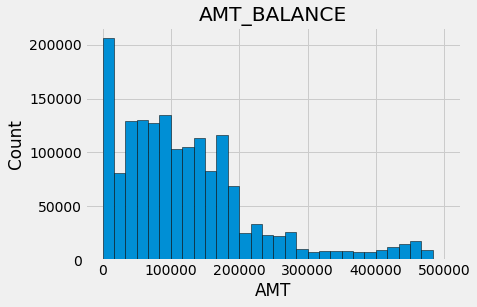

0.0

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of plots
plt.style.use('fivethirtyeight')

temp = credit_card_balance[credit_card_balance['AMT_BALANCE'].values > 0]
temp = temp[temp['AMT_BALANCE'].values < 500000]

# Plot the distribution of ages in years
plt.hist(temp['AMT_BALANCE'], edgecolor = 'k', bins = 30)
plt.title('AMT_BALANCE'); plt.xlabel('AMT'); plt.ylabel('Count');

plt.show()

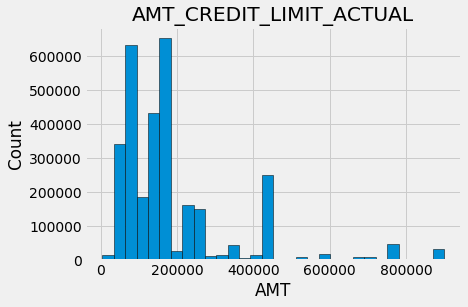

0

In [97]:
temp = credit_card_balance[credit_card_balance['AMT_CREDIT_LIMIT_ACTUAL'].values > 0]
temp = temp[temp['AMT_CREDIT_LIMIT_ACTUAL'].values < 1000000]

plt.hist(temp['AMT_CREDIT_LIMIT_ACTUAL'], edgecolor = 'k', bins = 30)
plt.title('AMT_CREDIT_LIMIT_ACTUAL'); plt.xlabel('AMT'); plt.ylabel('Count');
plt.show()

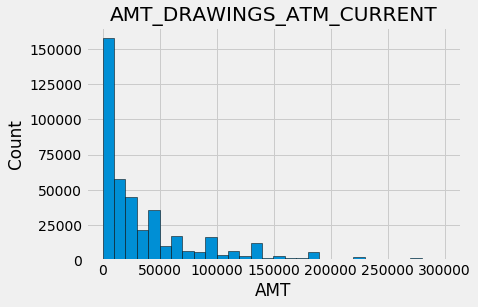

In [70]:
temp = credit_card_balance.copy()
temp['AMT_DRAWINGS_ATM_CURRENT'] = temp['AMT_DRAWINGS_ATM_CURRENT'].fillna(-999)
temp = temp[temp['AMT_DRAWINGS_ATM_CURRENT'].values > 0]
temp = temp[temp['AMT_DRAWINGS_ATM_CURRENT'].values < 300000]


plt.hist(temp['AMT_DRAWINGS_ATM_CURRENT'], edgecolor = 'k', bins = 30)
plt.title('AMT_DRAWINGS_ATM_CURRENT'); plt.xlabel('AMT'); plt.ylabel('Count');
plt.show()

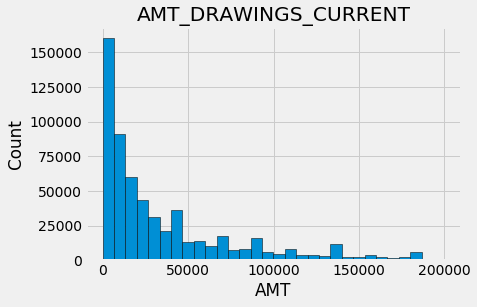

In [88]:
temp = credit_card_balance.copy()
temp['AMT_DRAWINGS_CURRENT'] = temp['AMT_DRAWINGS_CURRENT'].fillna(-999)
temp = temp[temp['AMT_DRAWINGS_CURRENT'].values > 0]
temp = temp[temp['AMT_DRAWINGS_CURRENT'].values < 200000]


plt.hist(temp['AMT_DRAWINGS_CURRENT'], edgecolor = 'k', bins = 30)
plt.title('AMT_DRAWINGS_CURRENT'); plt.xlabel('AMT'); plt.ylabel('Count');
plt.show()

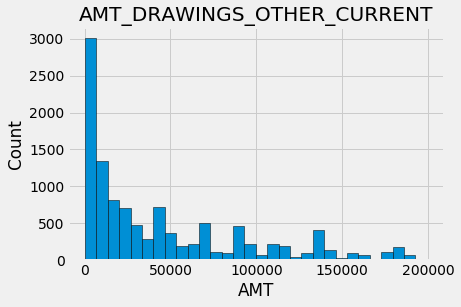

In [78]:
temp = credit_card_balance.copy()
temp['AMT_DRAWINGS_OTHER_CURRENT'] = temp['AMT_DRAWINGS_OTHER_CURRENT'].fillna(-999)
temp = temp[temp['AMT_DRAWINGS_OTHER_CURRENT'].values > 0]
temp = temp[temp['AMT_DRAWINGS_OTHER_CURRENT'].values < 200000]


plt.hist(temp['AMT_DRAWINGS_OTHER_CURRENT'], edgecolor = 'k', bins = 30)
plt.title('AMT_DRAWINGS_OTHER_CURRENT'); plt.xlabel('AMT'); plt.ylabel('Count');
plt.show()

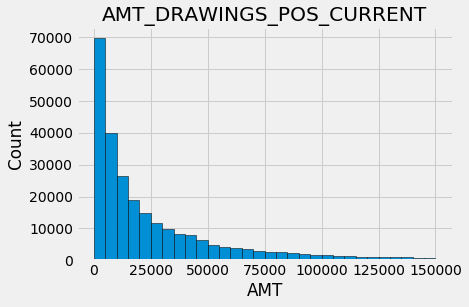

In [83]:
temp = credit_card_balance.copy()
temp['AMT_DRAWINGS_POS_CURRENT'] = temp['AMT_DRAWINGS_POS_CURRENT'].fillna(-999)
temp = temp[temp['AMT_DRAWINGS_POS_CURRENT'].values > 0]
temp = temp[temp['AMT_DRAWINGS_POS_CURRENT'].values < 150000]


plt.hist(temp['AMT_DRAWINGS_POS_CURRENT'], edgecolor = 'k', bins = 30)
plt.title('AMT_DRAWINGS_POS_CURRENT'); plt.xlabel('AMT'); plt.ylabel('Count');
plt.show()

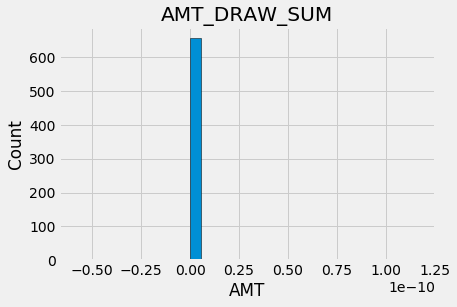

(688,)

In [100]:
temp = credit_card_balance.copy()
temp['AMT_DRAWINGS_POS_CURRENT'] = temp['AMT_DRAWINGS_POS_CURRENT'].fillna(-999)
temp = temp[temp['AMT_DRAWINGS_POS_CURRENT'].values > 0]
temp['AMT_DRAWINGS_OTHER_CURRENT'] = temp['AMT_DRAWINGS_OTHER_CURRENT'].fillna(-999)
temp = temp[temp['AMT_DRAWINGS_OTHER_CURRENT'].values > 0]
temp['AMT_DRAWINGS_ATM_CURRENT'] = temp['AMT_DRAWINGS_ATM_CURRENT'].fillna(-999)
temp = temp[temp['AMT_DRAWINGS_ATM_CURRENT'].values > 0]
temp['AMT_DRAWINGS_CURRENT'] = temp['AMT_DRAWINGS_CURRENT'].fillna(-999)
temp = temp[temp['AMT_DRAWINGS_CURRENT'].values > 0]
temp = temp[temp['AMT_BALANCE'].values > 0]

temp2 = (temp['AMT_DRAWINGS_CURRENT']-(temp['AMT_DRAWINGS_ATM_CURRENT']+temp['AMT_DRAWINGS_OTHER_CURRENT']+temp['AMT_DRAWINGS_POS_CURRENT']))

plt.hist(temp2, edgecolor = 'k', bins = 30)
plt.title('AMT_DRAW_SUM'); plt.xlabel('AMT'); plt.ylabel('Count');
plt.show()

In [3]:
df = pd.concat([train,test], axis = 0)
df = df[['SK_ID_CURR']]
credit = credit_card_balance.copy()

# Substraction, ratio, and score_dpd

In [7]:
import pandas as pd
import os
import gc
import numpy as np

def ratio_name(numerator, denominator): return numerator + '_divide_' + denominator

def ratio(df, numerator, denominator):
    return df[numerator] / df[denominator]

def substraction_name(col1, col2): return col1 + '_minus_' + col2

def substraction(df, col1, col2):
    return df[col1] - df[col2]

In [9]:
# Substraction
credit[substraction_name('AMT_CREDIT_LIMIT_ACTUAL', 'AMT_BALANCE')] = \
substraction(credit, 'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_BALANCE')

In [10]:
# Ratio
top = ['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',\
      'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',\
      'AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_CURRENT']

bot = ['AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_CURRENT','AMT_DRAWINGS_CURRENT', \
       'CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_CURRENT',\
       'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_POS_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_CURRENT']

In [11]:
# Ratio
for i in range(len(top)):
    print(top[i],bot[i])
    credit[ratio_name(top[i], bot[i])] = \
    ratio(credit, top[i], bot[i])

AMT_DRAWINGS_ATM_CURRENT AMT_DRAWINGS_CURRENT
AMT_DRAWINGS_POS_CURRENT AMT_DRAWINGS_CURRENT
AMT_DRAWINGS_OTHER_CURRENT AMT_DRAWINGS_CURRENT
CNT_DRAWINGS_ATM_CURRENT CNT_DRAWINGS_CURRENT
CNT_DRAWINGS_OTHER_CURRENT CNT_DRAWINGS_CURRENT
CNT_DRAWINGS_POS_CURRENT CNT_DRAWINGS_CURRENT
AMT_DRAWINGS_ATM_CURRENT CNT_DRAWINGS_ATM_CURRENT
AMT_DRAWINGS_POS_CURRENT CNT_DRAWINGS_POS_CURRENT
AMT_DRAWINGS_OTHER_CURRENT CNT_DRAWINGS_OTHER_CURRENT
AMT_DRAWINGS_CURRENT CNT_DRAWINGS_CURRENT


In [12]:
credit['score_DPD'] = 0
credit['score_DPD'] = (credit['SK_DPD']**3 + 5* credit['SK_DPD_DEF']**3 + 1) * (1/(1 + abs(credit['MONTHS_BALANCE']) ))

In [13]:
credit[['score_DPD','SK_DPD','SK_DPD_DEF', 'MONTHS_BALANCE' ]]

,score_DPD,SK_DPD,SK_DPD_DEF,MONTHS_BALANCE
0,0.142857,0,0,-6
1,0.500000,0,0,-1
2,0.125000,0,0,-7
3,0.200000,0,0,-4
4,0.500000,0,0,-1
5,43.000000,7,0,-7
6,0.142857,0,0,-6
7,0.125000,0,0,-7
8,0.200000,0,0,-4
9,0.166667,0,0,-5


In [14]:
col = [i for i in list(credit.columns.values) if credit[i].dtype!= 'object']
print(col)

['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE', 'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT', 'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE', 'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT', 'CNT_INSTALMENT_MATURE_CUM', 'SK_DPD', 'SK_DPD_DEF', 'AMT_CREDIT_LIMIT_ACTUAL_minus_AMT_BALANCE', 'AMT_DRAWINGS_ATM_CURRENT_divide_AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_POS_CURRENT_divide_AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT_divide_AMT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_ATM_CURRENT_divide_CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT_divide_CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_POS_CURRENT_divide_CNT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_ATM_CURRENT_divide_CNT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_POS_CURRENT_divide_CNT_DRAWINGS

# Numerical Columns

In [15]:
numerical_cols = ['SK_DPD', 'SK_DPD_DEF', 'AMT_BALANCE', 'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT', 'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE', 'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT', 'CNT_INSTALMENT_MATURE_CUM', 'AMT_CREDIT_LIMIT_ACTUAL_minus_AMT_BALANCE', 'AMT_DRAWINGS_ATM_CURRENT_divide_AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_POS_CURRENT_divide_AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT_divide_AMT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_ATM_CURRENT_divide_CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT_divide_CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_POS_CURRENT_divide_CNT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_ATM_CURRENT_divide_CNT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_POS_CURRENT_divide_CNT_DRAWINGS_POS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT_divide_CNT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_CURRENT_divide_CNT_DRAWINGS_CURRENT', 'score_DPD']

In [16]:
numerical_len = len(numerical_cols)
extrafunc_list = [_ for _ in range(len(numerical_cols))]
for i in range(len(numerical_cols)):
    if i == 0 or i == 1:
        extrafunc_list[i] = ['positive_count']
    else:
        if i == 2:
            extrafunc_list[i] = ['positive_count', 'negative_count']
        else:
            extrafunc_list[i] = None
print(extrafunc_list)

[['positive_count'], ['positive_count'], ['positive_count', 'negative_count'], None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]


In [17]:
def numerical_agg(df, gp_col, agg_col, df_name, extrafunc_list = None):
    
    agg_list = ['max', 'min', 'std','mean']
    '''
    Possible extrafunc_list: ['sum','median','two_minus_one_third','positive_count', 'negative_count','standard_error', 'trimmed_mean_10_pct', 'trimmed_mean_25_pct','normed_std', 'max_minus_min','one_third','two_third']
    '''
    if extrafunc_list:
        if 'one_third' in extrafunc_list:
            def one_third(series):
                return series.quantile(1/3)
            
        if 'two_third' in extrafunc_list:
            def two_third(series):
                return series.quantile(2/3)
            
        if 'max_minus_min' in extrafunc_list:
            def max_minus_min(series):
                return (series.max() - series.min())
        
        if 'two_minus_one_third' in extrafunc_list:
#             print('two_minus_one')
#             print('get two minus one')
            def two_minus_one_third(series):
                return(series.quantile(0.66666) - series.quantile(0.33333))
       
        if 'positive_count' in extrafunc_list:
#             print('get positive count')
            def positive_count(series):
                return pd.Series(series > 0).sum()

        if 'negative_count' in extrafunc_list:
#             print('get negative count')
            def negative_count(series):
                return pd.Series(series < 0).sum()

        if 'standard_error' in extrafunc_list:
#             print('get std-error')
            def standard_error(series):
                return series.std()/np.sqrt(len(series))

        if 'normed_std' in extrafunc_list:
#             print('get normed_std')
            def normed_std(series):
                return series.std()/series.mean()

        if 'trimmed_mean_10_pct' in extrafunc_list:
#             print('get_trimmed 10 pct')
            def trimmed_mean_10_pct(series):
                return stats.trim_mean(series.dropna(), 0.1)

        if 'trimmed_mean_25_pct' in extrafunc_list:
#             print('get_trimmed 25 pct')
            def trimmed_mean_25_pct(series):
                return stats.trim_mean(series.dropna(), 0.25)
        
        list_tocall = []
        for i in extrafunc_list:
            if i not in set(['sum', 'median']):
                list_tocall.append(eval(i))
            
    if extrafunc_list != None:   
        agg_list.extend(list_tocall)
    
    _df = df.groupby(gp_col).agg({agg_col:agg_list})
    columns = []
    for pre in _df.columns.levels[0]:
        for middle in _df.columns.levels[1]:
            columns.append('%s_%s_%s' %(df_name,pre,middle))
    _df.columns = columns
    
    return _df.reset_index()

In [20]:
gp_col = 'SK_ID_CURR'
for i in range(len(extrafunc_list)):
    print(numerical_cols[i])
    df = df.merge(numerical_agg(credit, gp_col, numerical_cols[i], 'credit_card', extrafunc_list = extrafunc_list[i]), on = 'SK_ID_CURR', how='left')

SK_DPD
SK_DPD_DEF
AMT_BALANCE
AMT_CREDIT_LIMIT_ACTUAL
AMT_DRAWINGS_ATM_CURRENT
AMT_DRAWINGS_CURRENT
AMT_DRAWINGS_OTHER_CURRENT
AMT_DRAWINGS_POS_CURRENT
AMT_INST_MIN_REGULARITY
AMT_PAYMENT_CURRENT
AMT_PAYMENT_TOTAL_CURRENT
AMT_RECEIVABLE_PRINCIPAL
AMT_RECIVABLE
AMT_TOTAL_RECEIVABLE
CNT_DRAWINGS_ATM_CURRENT
CNT_DRAWINGS_CURRENT
CNT_DRAWINGS_OTHER_CURRENT
CNT_DRAWINGS_POS_CURRENT
CNT_INSTALMENT_MATURE_CUM
AMT_CREDIT_LIMIT_ACTUAL_minus_AMT_BALANCE
AMT_DRAWINGS_ATM_CURRENT_divide_AMT_DRAWINGS_CURRENT
AMT_DRAWINGS_POS_CURRENT_divide_AMT_DRAWINGS_CURRENT
AMT_DRAWINGS_OTHER_CURRENT_divide_AMT_DRAWINGS_CURRENT
CNT_DRAWINGS_ATM_CURRENT_divide_CNT_DRAWINGS_CURRENT
CNT_DRAWINGS_OTHER_CURRENT_divide_CNT_DRAWINGS_CURRENT
CNT_DRAWINGS_POS_CURRENT_divide_CNT_DRAWINGS_CURRENT
AMT_DRAWINGS_ATM_CURRENT_divide_CNT_DRAWINGS_ATM_CURRENT
AMT_DRAWINGS_POS_CURRENT_divide_CNT_DRAWINGS_POS_CURRENT
AMT_DRAWINGS_OTHER_CURRENT_divide_CNT_DRAWINGS_OTHER_CURRENT
AMT_DRAWINGS_CURRENT_divide_CNT_DRAWINGS_CURRENT
score_

# Categorical

In [21]:
def _set_type(series, dtype):
    _max, _min = max(series), min(series)
    if dtype == 'uint':
        if _max <= 255: return np.uint8
        elif _max <= 65535: return np.uint16
        elif _max <= 4294967295: return np.uint32
        else: return np.uint64
    elif dtype == 'int':
        if _min >= -128 and _max <= 127: return np.int8
        elif _min >=-32768 and _max <= 32767: return np.int16
        elif _min >= -2147483648 and _max <= 2147483647: return np.int32
        else: return np.int64
    elif dtype == 'float':
        if max(abs(_min), _max) <= 3.4028235e+38: return np.float32
        else: return np.float64

def split_categorical_feature(df, group_col, calc_col):
    tmp_df = pd.concat([df[group_col], pd.get_dummies(df[calc_col], prefix=calc_col)], axis=1).groupby(by=group_col).sum().reset_index()
    dtype = {x: _set_type(tmp_df[x], 'uint') for x in tmp_df.columns if x != group_col}
    for x in tmp_df:
        if x in df.columns:
            dtype[x] = df[x].dtype
    return tmp_df.astype(dtype)

In [22]:
categorical_cols = ['NAME_CONTRACT_STATUS']

for x in categorical_cols:
    print(x)
    df = df.merge(split_categorical_feature(credit, 'SK_ID_CURR', x), on='SK_ID_CURR', how='left')
    gc.collect()

NAME_CONTRACT_STATUS


# Months Balance max min and sum

In [23]:
_df = credit.groupby('SK_ID_CURR').agg({'MONTHS_BALANCE':['sum','min','max']})
columns = []
for pre in _df.columns.levels[0]:
    for middle in _df.columns.levels[1]:
        columns.append('%s_%s_%s' %('credit_card',pre,middle))
_df.columns = columns
df = df.merge(_df.reset_index(), on = 'SK_ID_CURR', how='left')

In [26]:
print(df.columns.values, len(df.columns.values))

['SK_ID_CURR' 'credit_card_SK_DPD_max_x' 'credit_card_SK_DPD_min_x'
 'credit_card_SK_DPD_std_x' 'credit_card_SK_DPD_mean_x'
 'credit_card_SK_DPD_positive_count_x' 'credit_card_SK_DPD_DEF_max_x'
 'credit_card_SK_DPD_DEF_min_x' 'credit_card_SK_DPD_DEF_std_x'
 'credit_card_SK_DPD_DEF_mean_x' 'credit_card_SK_DPD_DEF_positive_count_x'
 'credit_card_SK_DPD_max_y' 'credit_card_SK_DPD_min_y'
 'credit_card_SK_DPD_std_y' 'credit_card_SK_DPD_mean_y'
 'credit_card_SK_DPD_positive_count_y' 'credit_card_SK_DPD_DEF_max_y'
 'credit_card_SK_DPD_DEF_min_y' 'credit_card_SK_DPD_DEF_std_y'
 'credit_card_SK_DPD_DEF_mean_y' 'credit_card_SK_DPD_DEF_positive_count_y'
 'credit_card_AMT_BALANCE_max' 'credit_card_AMT_BALANCE_min'
 'credit_card_AMT_BALANCE_std' 'credit_card_AMT_BALANCE_mean'
 'credit_card_AMT_BALANCE_positive_count'
 'credit_card_AMT_BALANCE_negative_count'
 'credit_card_AMT_CREDIT_LIMIT_ACTUAL_max'
 'credit_card_AMT_CREDIT_LIMIT_ACTUAL_min'
 'credit_card_AMT_CREDIT_LIMIT_ACTUAL_std'
 'credit_card